In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [2]:
con = sqlite3.connect('/home/pi/Documents/code/airq_pc/data/airquality.db')

no2 = pd.read_sql_query("SELECT * from NO2",con)
co = pd.read_sql_query("SELECT * from CO",con)
o3 = pd.read_sql_query("SELECT * from O3",con)

no2['datetime'] = pd.to_datetime(no2['timestamp'])
co['datetime'] = pd.to_datetime(co['timestamp'])
o3['datetime'] = pd.to_datetime(o3['timestamp'])

co.drop(['timestamp', 'id'], axis = 1, inplace=True)
o3.drop(['timestamp', 'id'], axis = 1, inplace=True)
no2.drop(['timestamp', 'id'], axis = 1, inplace=True)

OperationalError: unable to open database file

<AxesSubplot:xlabel='datetime', ylabel='value'>

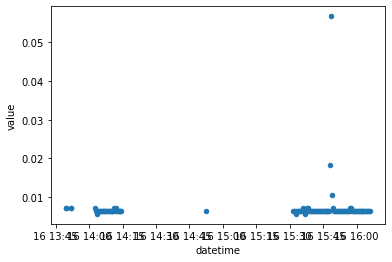

In [3]:
no2.plot.scatter(x="datetime", y="value")

<AxesSubplot:xlabel='datetime', ylabel='value'>

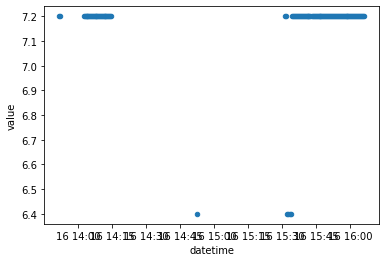

In [4]:
o3.plot.scatter(x="datetime", y="value")

<AxesSubplot:xlabel='datetime', ylabel='value'>

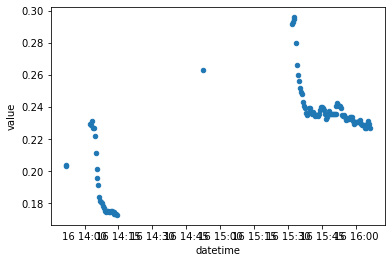

In [5]:
co.plot.scatter(x="datetime", y="value")